In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 

In [3]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", sep=",", encoding="utf-8")
print("\n************** Checking Attribute Datatypes ************\n")
df.info()


************** Checking Attribute Datatypes ************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float6


************** Counts Per Target Value ************

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


<Axes: xlabel='Diabetes_012', ylabel='count'>

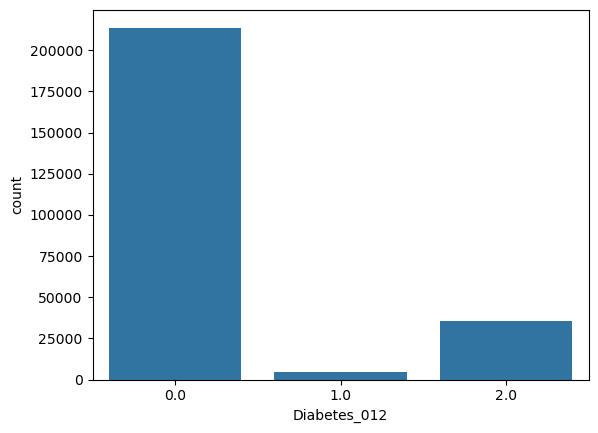

In [4]:
print("\n************** Counts Per Target Value ************\n")
print(df['Diabetes_012'].value_counts())
sns.countplot(x="Diabetes_012", data=df)


************** Counts Per Target Value After Prediabetic Removal ************

Diabetes_012
0.0    213703
2.0     35346
Name: count, dtype: int64


<Axes: xlabel='Diabetes_012', ylabel='count'>

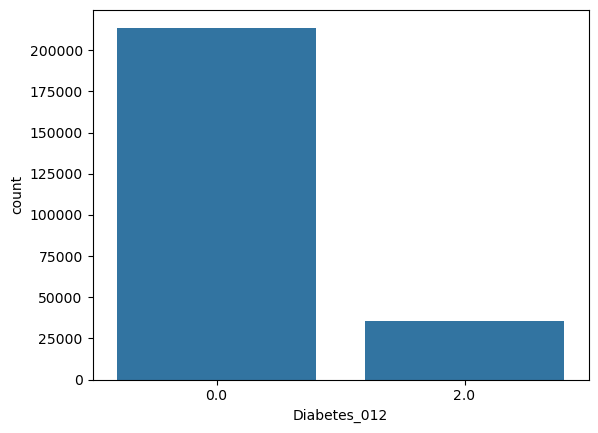

In [5]:
prediabetics = df[ df['Diabetes_012'] == 1 ].index 

df.drop(prediabetics, inplace=True) 

df = df[['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'Diabetes_012']] 

print("\n************** Counts Per Target Value After Prediabetic Removal ************\n")
print(df['Diabetes_012'].value_counts())
sns.countplot(x="Diabetes_012", data=df)

In [6]:
df

,HighBP,HighChol,HeartDiseaseorAttack,Stroke,Diabetes_012
0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
253675,1.0,1.0,0.0,0.0,0.0
253676,1.0,1.0,0.0,0.0,2.0
253677,0.0,0.0,0.0,0.0,0.0
253678,1.0,0.0,0.0,0.0,0.0


In [7]:
X = df.drop('Diabetes_012',axis=1)
y = df['Diabetes_012']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train_resampled)
scaled_X_test = scaler.transform(X_test)

In [10]:
lr_model = LogisticRegressionCV(cv=10, 
                                random_state=50, 
                                verbose=0)
lr_model.fit(scaled_X_train, y_train_resampled)

LogisticRegressionCV(cv=10, random_state=50)

In [11]:
y_pred = lr_model.predict(scaled_X_test)
y_pred

array([0., 2., 0., ..., 0., 2., 0.])

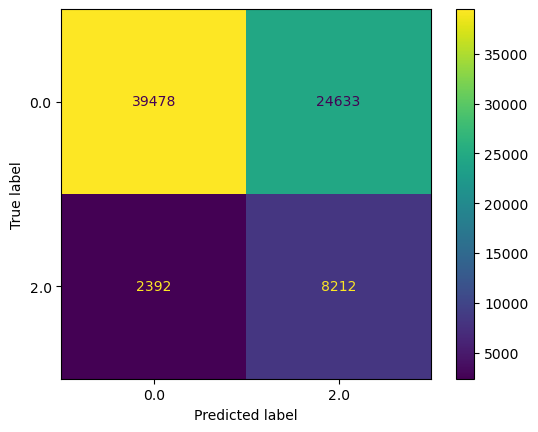

In [12]:
matrix = confusion_matrix(y_test, y_pred)

confusion_display = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                          display_labels=lr_model.classes_)
confusion_display.plot()

plt.show()

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75     64111
         2.0       0.25      0.77      0.38     10604

    accuracy                           0.64     74715
   macro avg       0.60      0.70      0.56     74715
weighted avg       0.84      0.64      0.69     74715

